## GOAL

#### A large bank has asked us to evaluate the marketing algorithms they use for retail banking. Their sophisticated phone marketing algorithm predicts whether a certain person will subscribe to a term deposit or not. Based on that assessment, the bank then optimises its phone calling strategy. With this algorithm, the bank has been successful in predicting which clients are more likely to subscribe to their term deposits. 
#### Management is now interested in finding out how a classification model can lead to certain decision-making processes. 
- Create a classification model in Python. Feel free to use libraries such as SkLearn, Keras/Tensorflow or Pytorch. 
- Analyse the model and provide insight into which features/variables influence the outcome of the classification the most: on a global level, and specifically for observation #4 and #20
- Develop some form of plot or graph with brief comments on your observations. 

## Table of Contents
* [Categorical Data Exploration](#1)
* [Visualizing Categorical Data](#2)
* [Visualizing Numerical Data](#3)
* [Finding correlation](#4)
* [Cleaning the data](#5)
* [Handling the outliers](#6)
* [Visualizing clean data](#7)
* [Splitting and scaling](#8)
* [Builting svm model](#9)
* [Confusion Matrix](#10)
* [Report and Observations](#11)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,accuracy_score,classification_report,confusion_matrix

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.drop('duration',axis=1,inplace=True)

In [7]:
# finding out some facts on the given data
df.shape

(41188, 20)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
df_cols=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y']
# storing it incase it is useful for later

In [11]:
len(df_cols)

20

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [16]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Categorical data exploration <a class="anchor" id="1"></a>

In [34]:
# education status of cliend
print("Education : \n", df['education'].unique())

# how many unique jobs are there
print("Jobs : \n",df['job'].unique())

# matiral status of client
print("MArital Status : \n", df['marital'].unique())

Education : 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Jobs : 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
MArital Status : 
 ['married' 'single' 'divorced' 'unknown']


In [84]:
print('Default:', df['default'].unique())
print('Housing:', df['housing'].unique())
print('Loan:', df['loan'].unique())
print('pOutcome:', df['poutcome'].unique())

Default: ['no' 'unknown' 'yes']
Housing: ['no' 'yes' 'unknown']
Loan: ['no' 'yes' 'unknown']
pOutcome: ['nonexistent' 'failure' 'success']


We can observe that there are a lot of 'Unknown' entities thats present in the data

In [28]:
len(df[df['education']=='unknown'])

1731

In [29]:
len(df[df['housing']=='unknown'])

990

In [30]:
len(df[df['loan']=='unknown'])

990

In [31]:
len(df[df['default']=='unknown'])

8597

In [32]:
len(df[df['marital']=='unknown'])

80

In [33]:
len(df[df['job']=='unknown'])

330

### Visualizing this data <a class="anchor" id="2"></a>

In [36]:
df_grouped = df.groupby('y')

In [37]:
df_grouped.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [39]:
# creating a function to visualize horizontal bars
def plot_barh(array, incrementer,bias, text_color='blue',palette_style='darkgrid', palette_color='RdBu'):
    sns.set_style(palette_style)
    sns.set_palette(palette_color)
    
    plt.barh(array.index,width=array.values,height=.5)
    plt.yticks(np.arange(len(array)))
    plt.xticks(range(0, round(max(array)) +bias, incrementer))
    
    for index,value in enumerate(array.values):
        plt.text(value +.5, index, s='{:.1f}'.format(value),color=text_color)
        
    return plt

In [45]:
def feature_perc(feature,groupby= 'yes'):

    count = df_grouped.get_group(groupby)[feature].value_counts()
    total_count = df[feature].value_counts()[count.index]

    perc = (count/total_count)*100
    return perc

In [46]:
object_column = df.dtypes[df.dtypes == 'object'].index
object_column

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

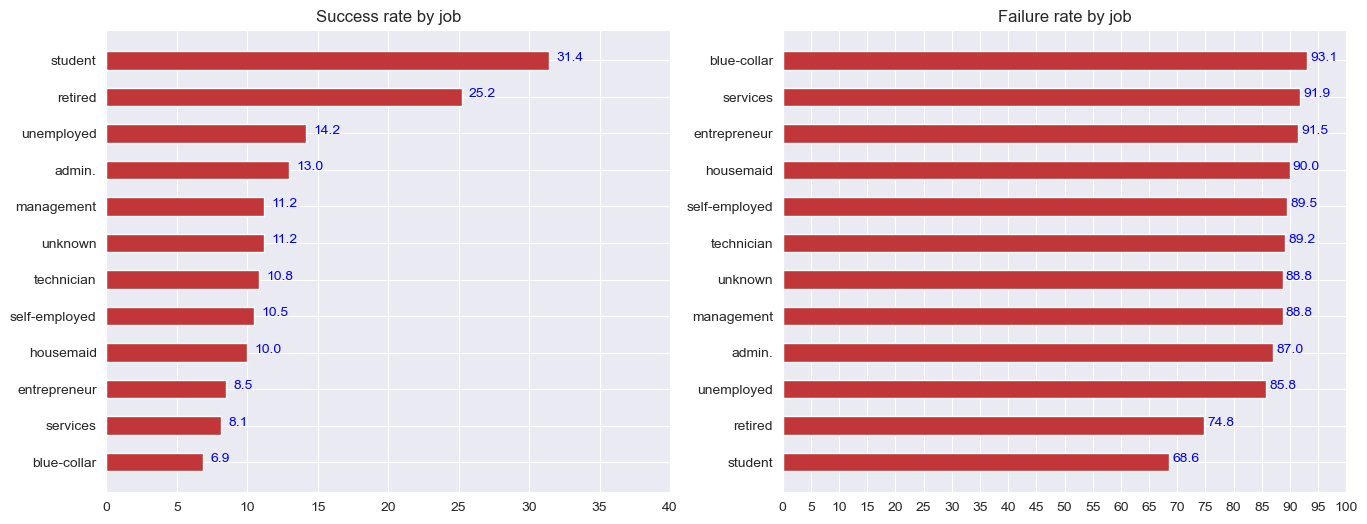

<Figure size 640x480 with 0 Axes>

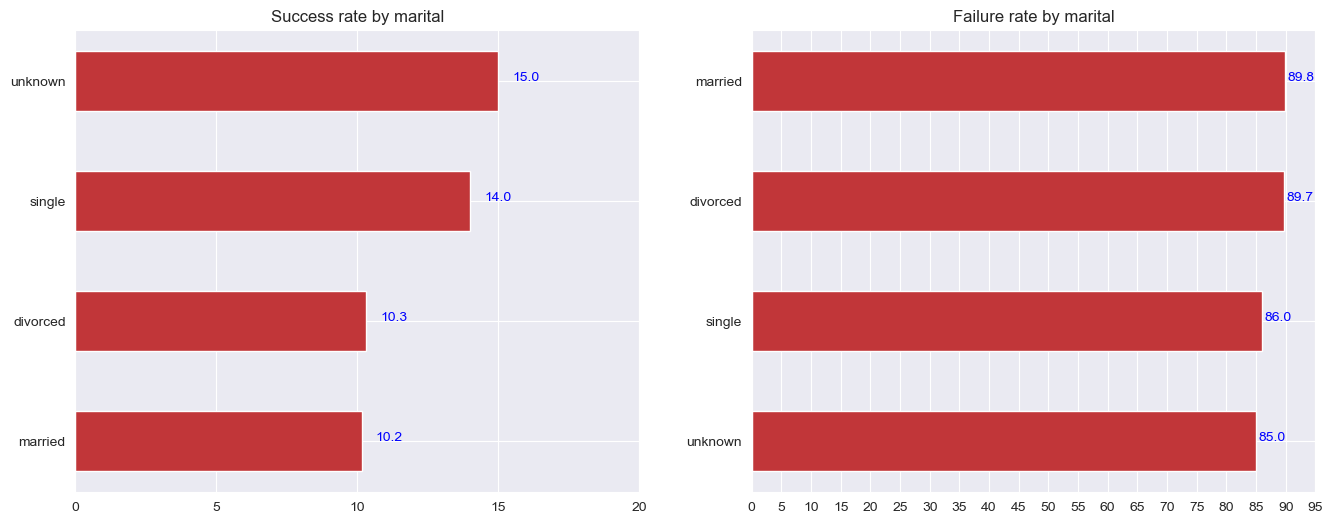

<Figure size 640x480 with 0 Axes>

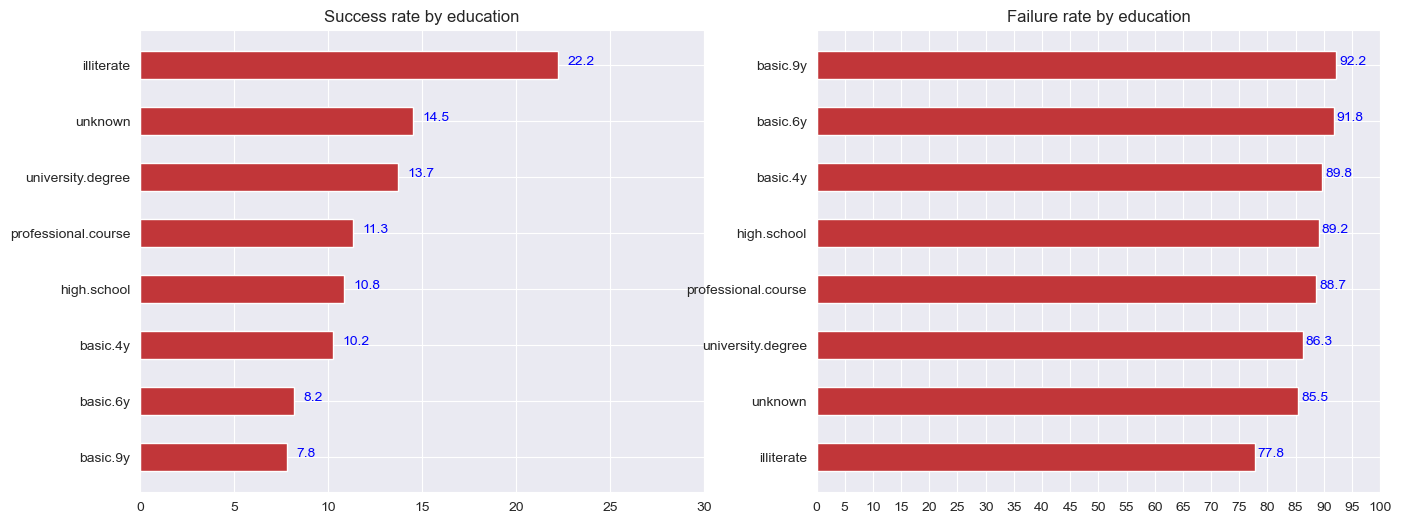

<Figure size 640x480 with 0 Axes>

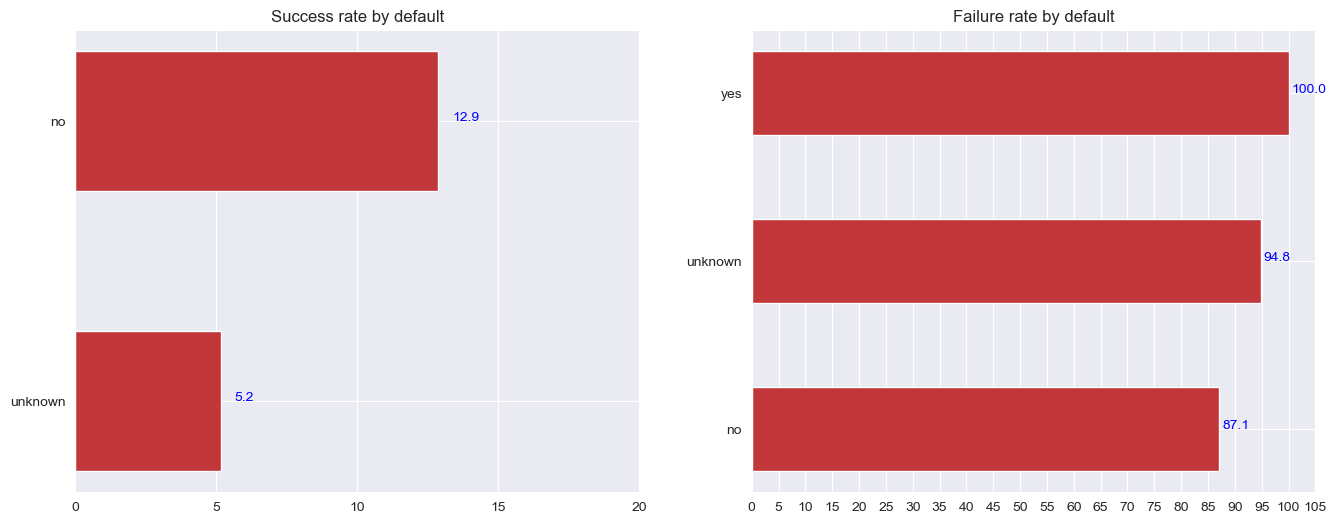

<Figure size 640x480 with 0 Axes>

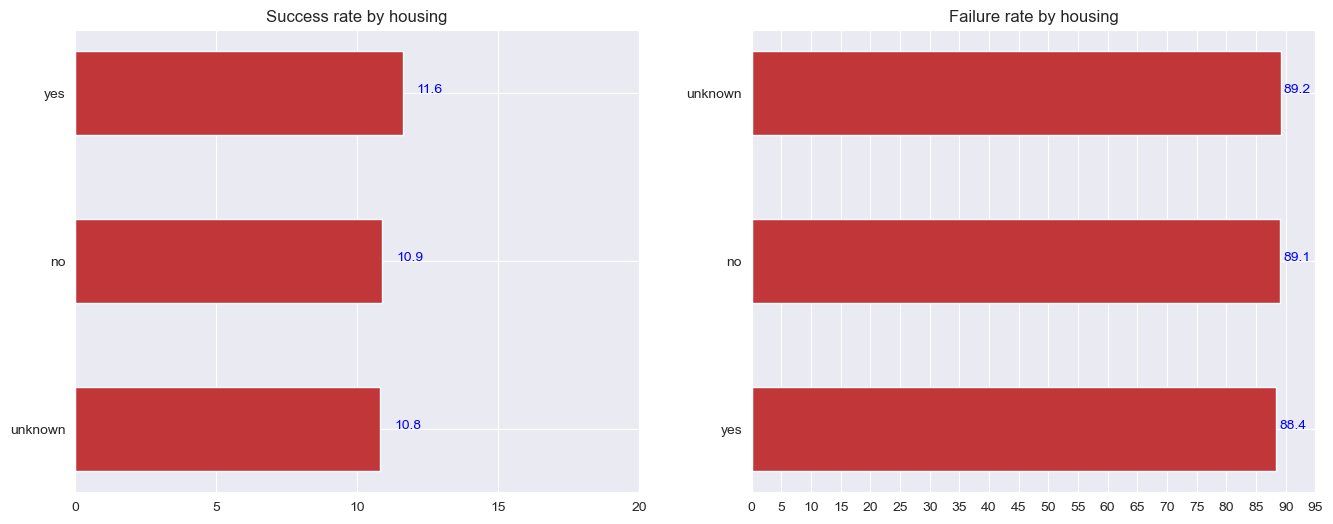

<Figure size 640x480 with 0 Axes>

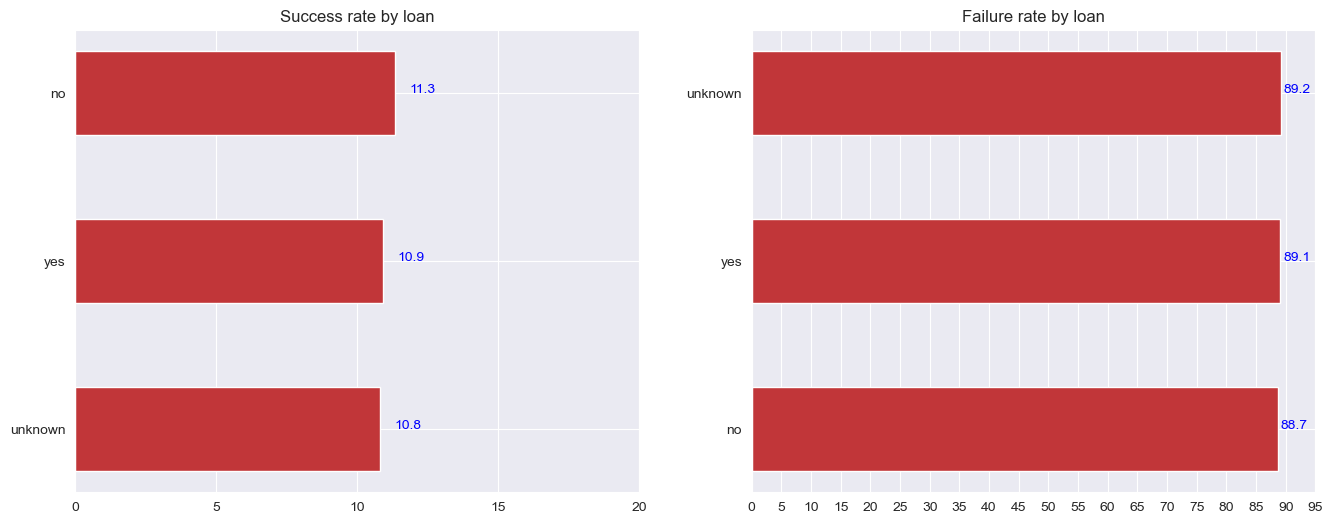

<Figure size 640x480 with 0 Axes>

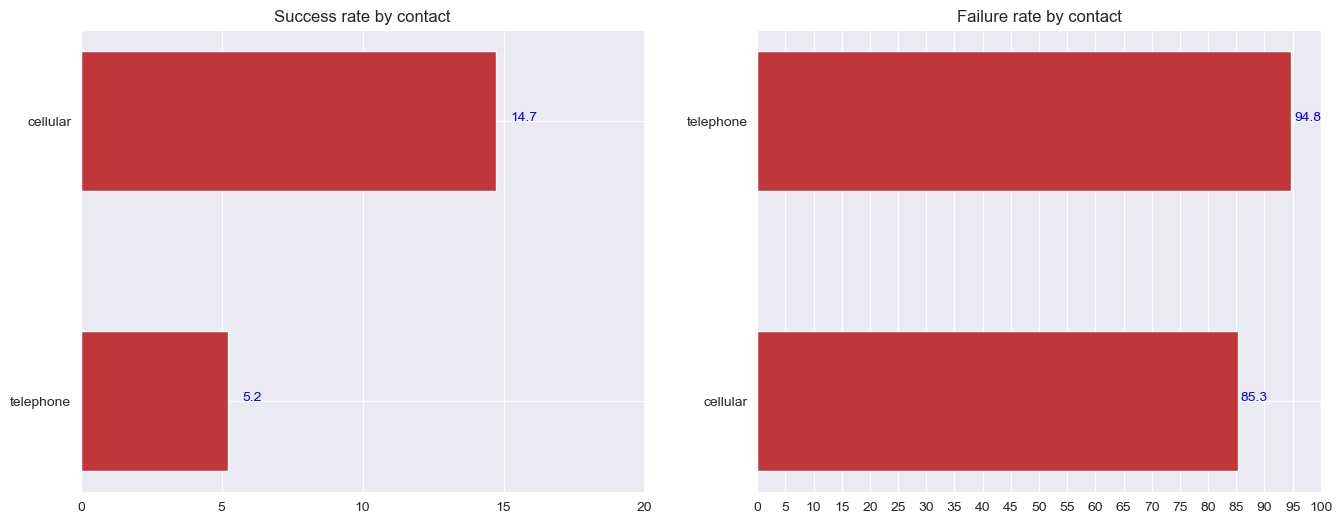

<Figure size 640x480 with 0 Axes>

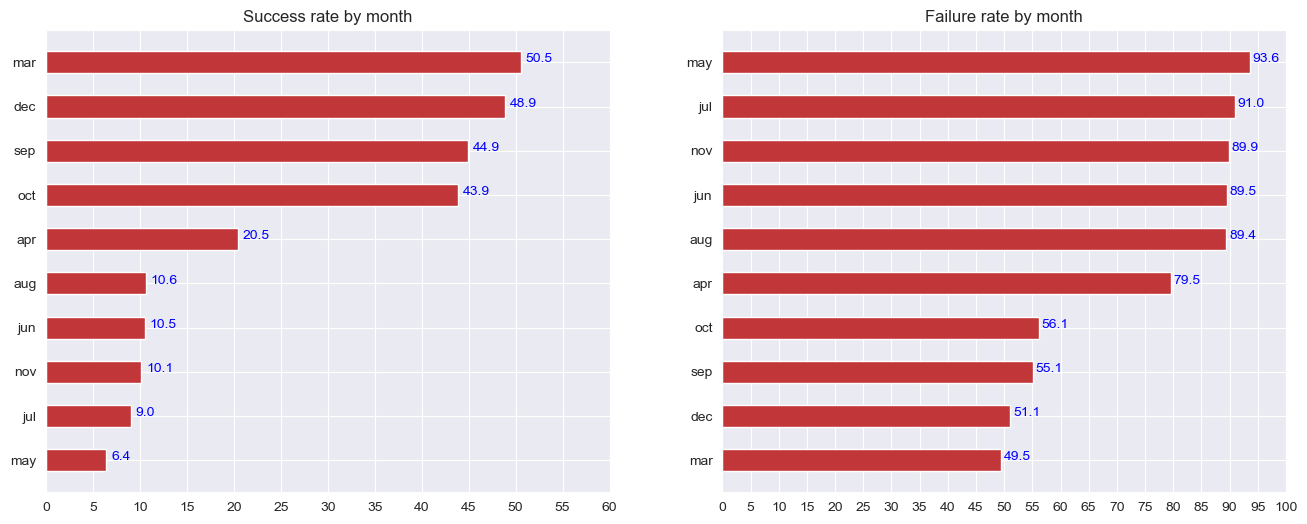

<Figure size 640x480 with 0 Axes>

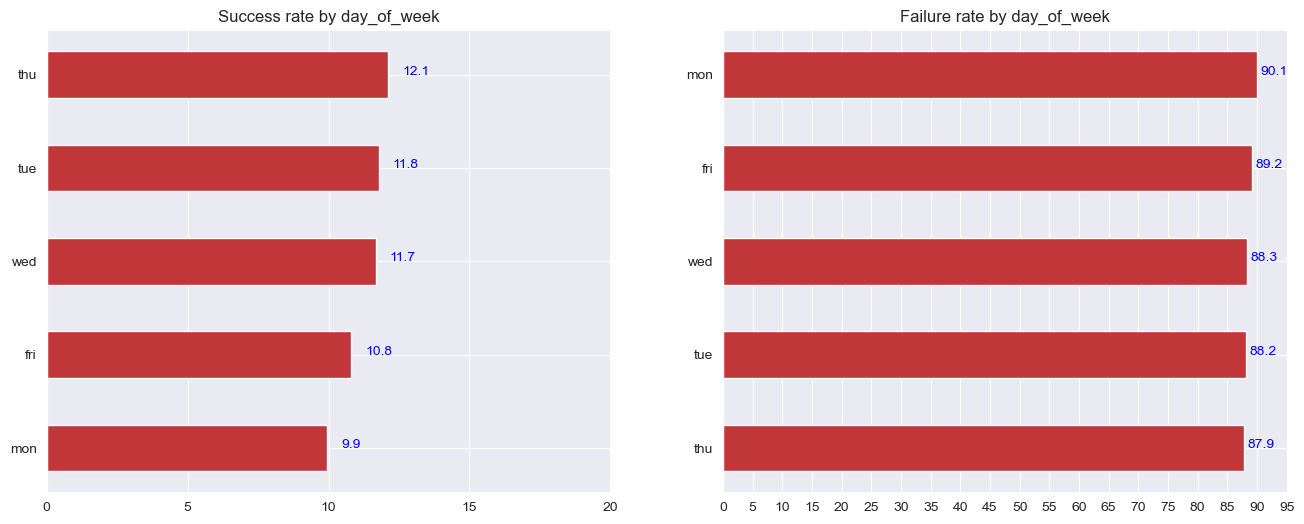

<Figure size 640x480 with 0 Axes>

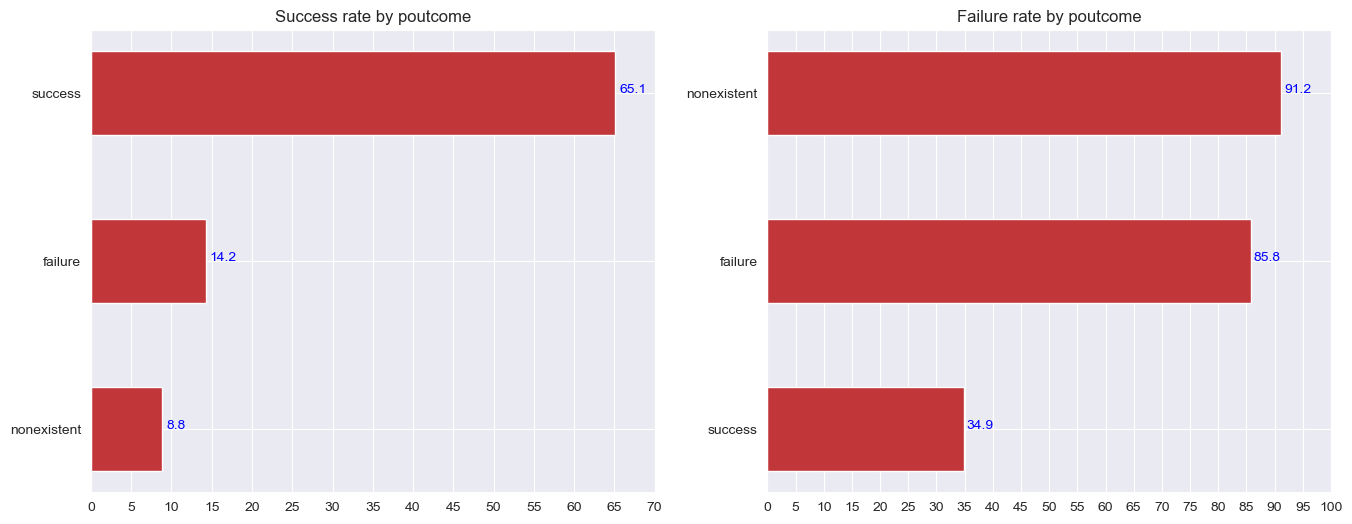

<Figure size 640x480 with 0 Axes>

In [51]:
for col in object_column[:-1]:
    yes_perc = feature_perc(col, groupby='yes')
    no_perc = feature_perc(col, groupby='no')
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    plt.title(f"Success rate by {col}")
    plot_barh(yes_perc.sort_values(),incrementer=5,bias=10)
    
    plt.subplot(1,2,2)
    plt.title(f"Failure rate by {col}")
    plot_barh(no_perc.sort_values(),incrementer=5,bias=10)
    plt.show()
    
    plt.savefig(f'categorical_plot_{col}.png')
    print()

### Visualization for numarical data <a class="anchor" id="3"></a>

In [53]:
int_col = df.dtypes[df.dtypes =='int64'].index | df.dtypes[df.dtypes =='float64'].index

C:\Users\dbhav\AppData\Local\Temp\ipykernel_17932\831744045.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  int_col = df.dtypes[df.dtypes =='int64'].index | df.dtypes[df.dtypes =='float64'].index


In [104]:
int_col

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')

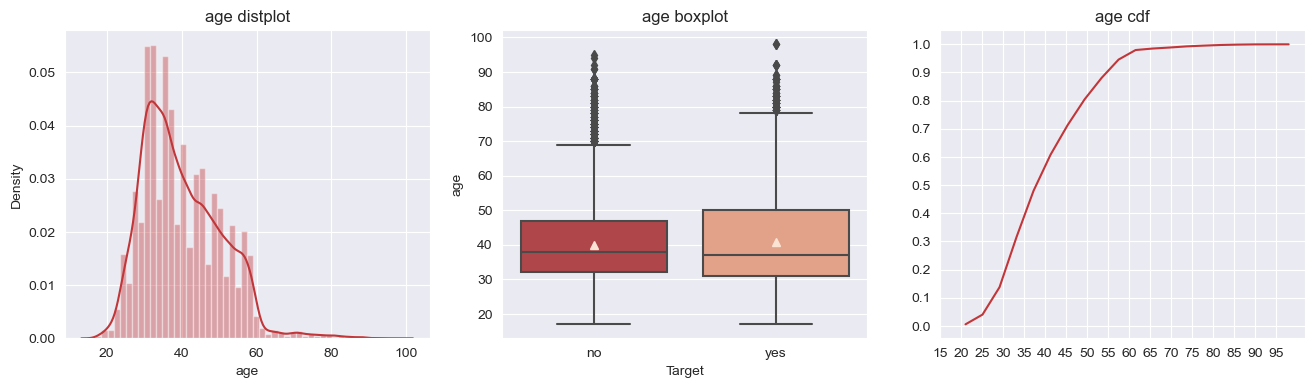

<Figure size 640x480 with 0 Axes>

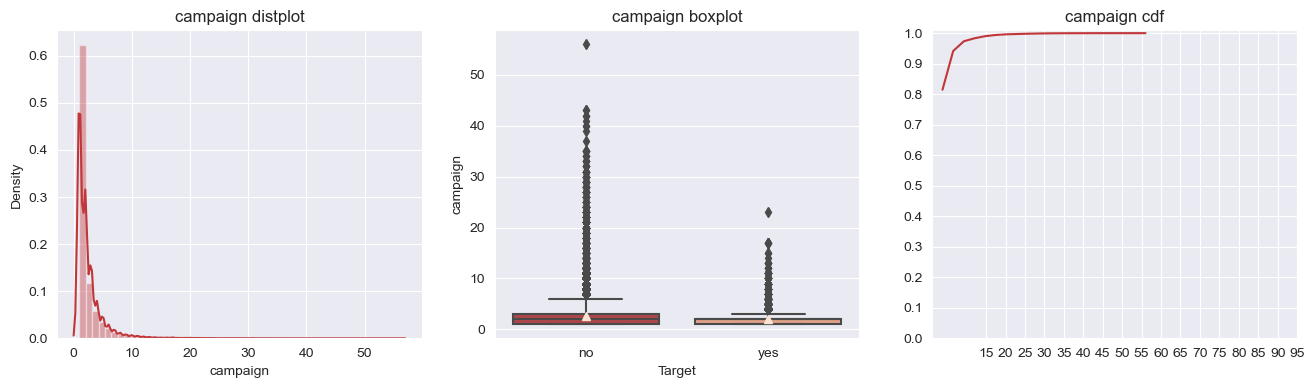

<Figure size 640x480 with 0 Axes>

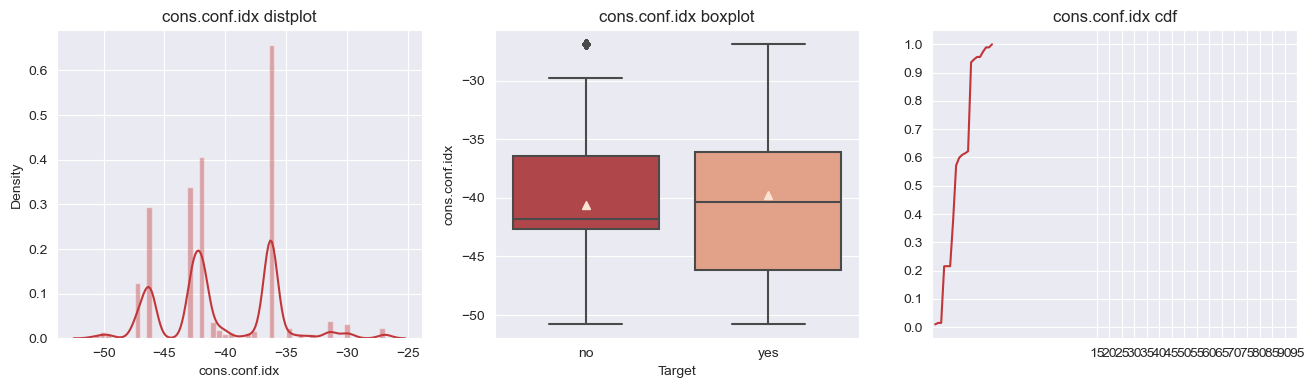

<Figure size 640x480 with 0 Axes>

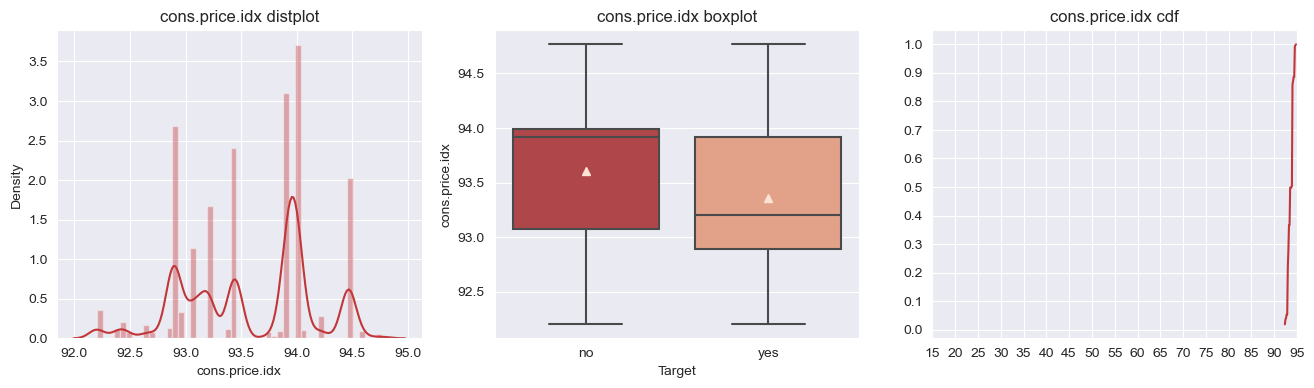

<Figure size 640x480 with 0 Axes>

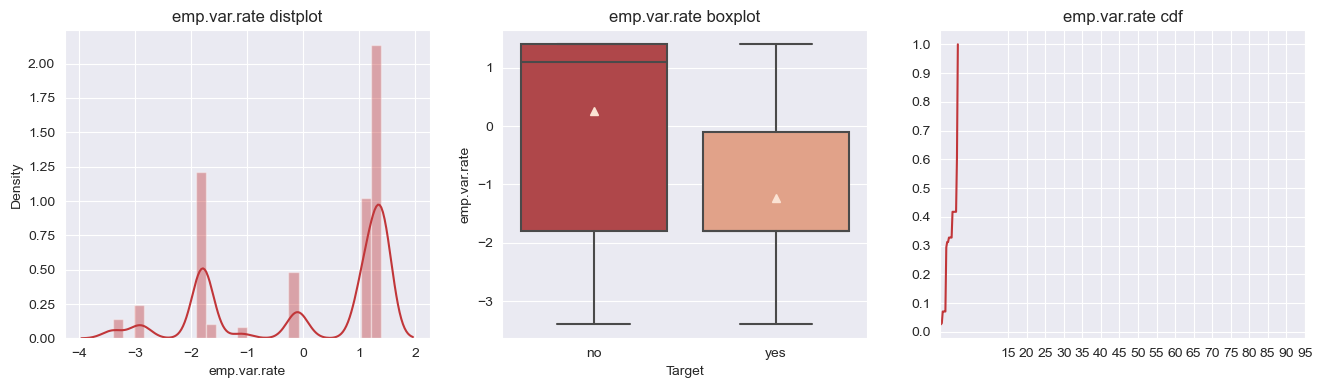

<Figure size 640x480 with 0 Axes>

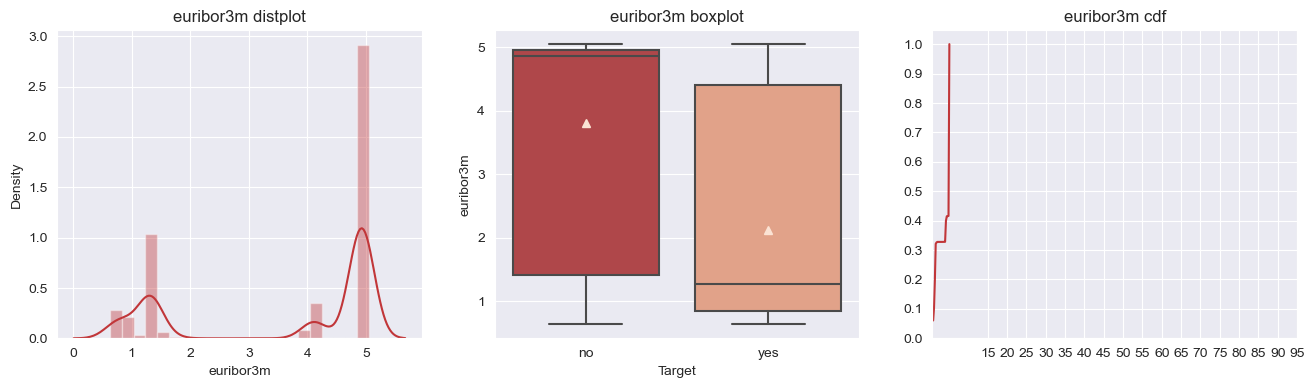

<Figure size 640x480 with 0 Axes>

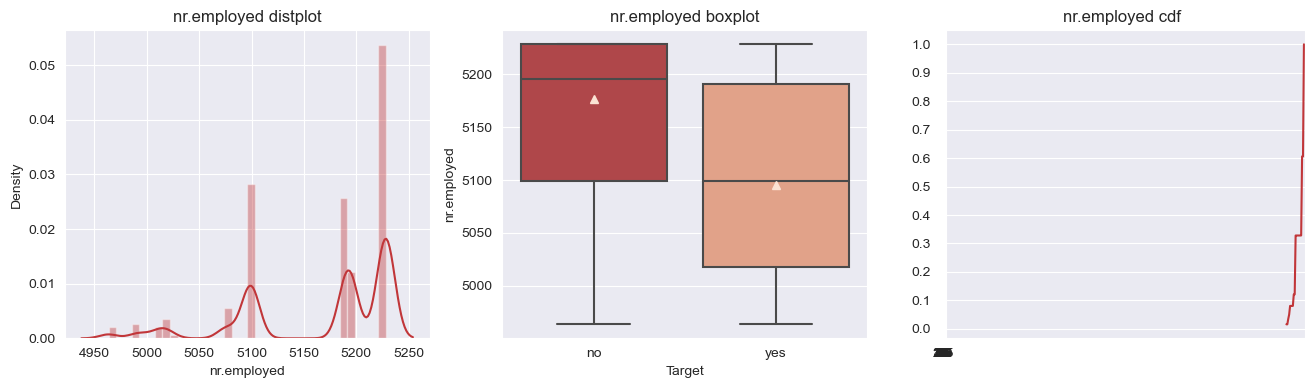

<Figure size 640x480 with 0 Axes>

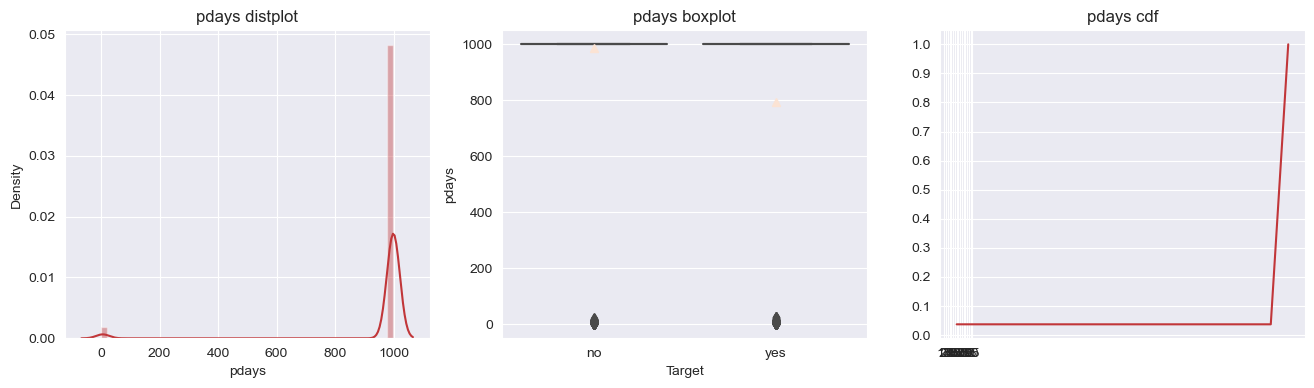

<Figure size 640x480 with 0 Axes>

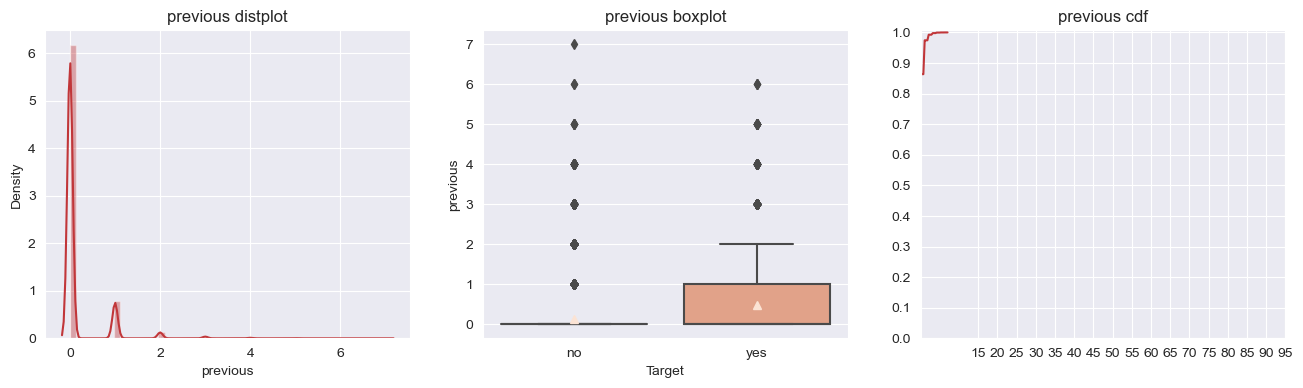

<Figure size 640x480 with 0 Axes>

In [57]:
for col in int_col:
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f"{col} distplot")
    
    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=col, data=df, showmeans=True)
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f"{col} boxplot")
    
    plt.subplot(1,3,3)
    count,bins=np.histogram(df[col],bins=20, normed=True)
    cdf = np.cumsum(count)
    plt.plot(bins[1:], cdf/cdf[-1])
    plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f"{col} cdf")
    
    plt.show()
    
    plt.savefig(f'categorical_plot_{col}.png')
    print()

In [130]:
def plot_int(col,df):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(f"{col} distplot")
    plt.subplot(1,3,2)
    sns.boxplot(x='y', y=col, data=df, showmeans=True)
    plt.xlabel('Target')
    plt.ylabel(col)
    plt.title(f"{col} boxplot")
    plt.subplot(1,3,3)
    count,bins=np.histogram(df[col],bins=20, normed=True)
    cdf = np.cumsum(count)
    plt.plot(bins[1:], cdf/cdf[-1])
    plt.xticks(range(15,100,5))
    plt.yticks(np.arange(0,1.1,.1))
    plt.title(f"{col} cdf")

    plt.show()

    plt.savefig(f'categorical_plot_{col}.png')

## Correlation <a class="anchor" id="4"></a>

Finding correlation between the columns of dataframe

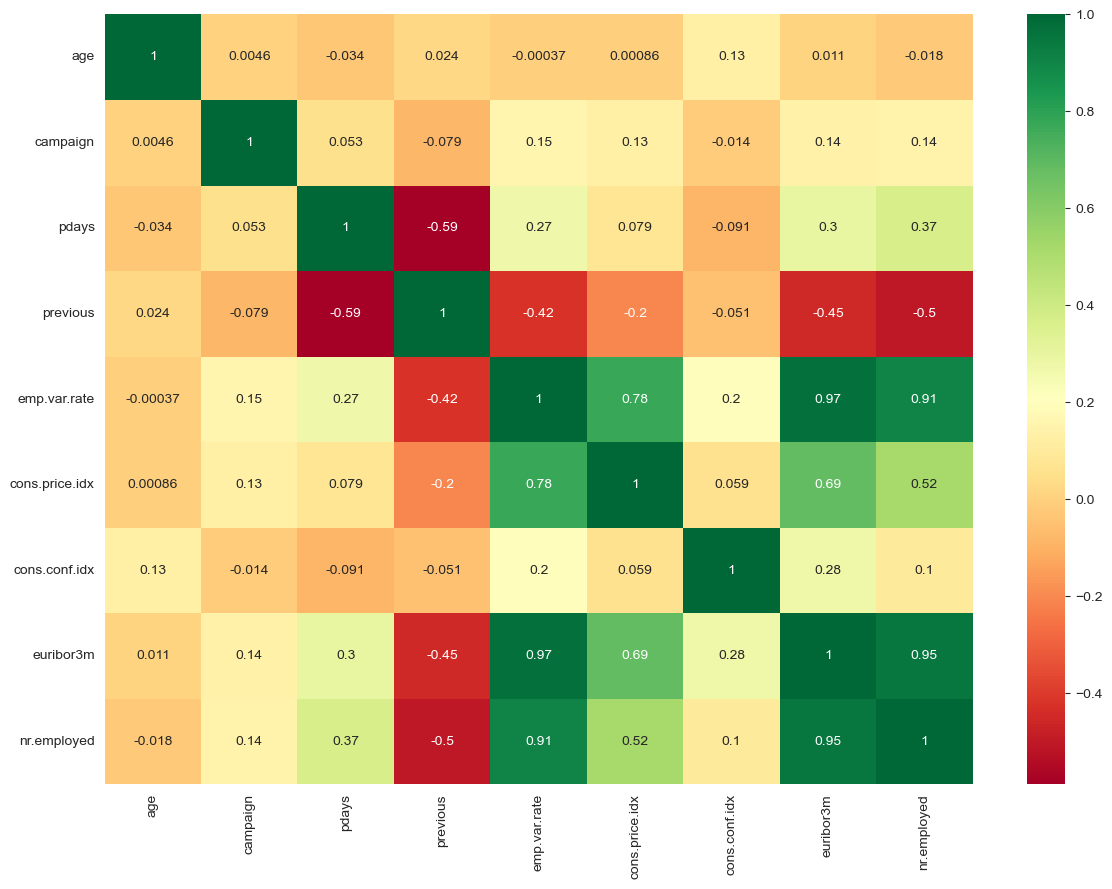

In [63]:
sns.heatmap(df.corr(), annot=True,cmap="RdYlGn")
fig=plt.gcf()

fig.set_size_inches(14,10)
plt.show()

## Cleaning the data <a class="anchor" id="5"></a>

In [95]:
df2=df.copy(deep=True)

### For ordinal data

In [96]:
print('Default:', df['default'].unique())
print('Housing:', df['housing'].unique())
print('Loan:', df['loan'].unique())
print('pOutcome:', df['poutcome'].unique())

Default: ['no' 'unknown' 'yes']
Housing: ['no' 'yes' 'unknown']
Loan: ['no' 'yes' 'unknown']
pOutcome: ['nonexistent' 'failure' 'success']


In [97]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
df2['poutcome']=df2['poutcome'].map({
    'failure':-1,
    'nonexistent':0,
    'success':1
})
df2['housing']=df2['housing'].map({
    'no':-1,
    'unknown':0,
    'yes':1
})
df2['default']=df2['default'].map({
    'no':-1,
    'unknown':0,
    'yes':1
})
df2['loan']=df2['loan'].map({
    'no':-1,
    'unknown':0,
    'yes':1
})

In [99]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,-1,-1,-1,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,0,-1,-1,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,-1,1,-1,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,-1,-1,-1,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,-1,-1,1,telephone,may,mon,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,no


### For nominal data

In [100]:
nominal =['job','marital','education','contact','month','day_of_week']
dataProcessed=pd.get_dummies(df2,columns=nominal)

In [101]:
dataProcessed['y']=dataProcessed['y'].map({
    'yes':1,
    'no':0
})

In [102]:
dataProcessed.head(10)

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,-1,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
1,57,0,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,37,-1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,40,-1,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,56,-1,-1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
5,45,0,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
6,59,-1,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
7,41,0,-1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
8,24,-1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
9,25,-1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


When we used distributions, we noticed so many outliers in the plots, hence we need to handle those or they would affect the accuracy of the SVM model we will create later

### Handling the outliers <a class="anchor" id="6"></a>

In [105]:
print(int_col)

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed', 'pdays', 'previous'],
      dtype='object')


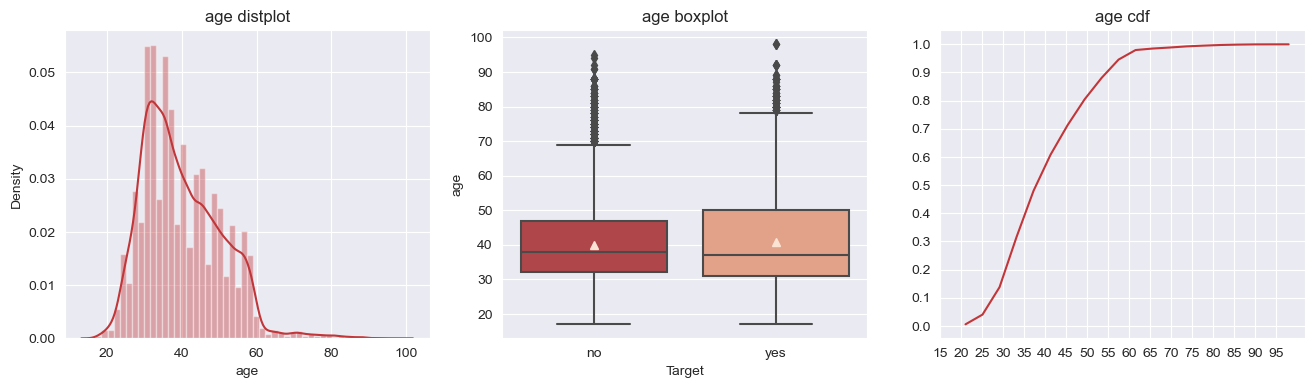

<Figure size 640x480 with 0 Axes>

In [115]:
col=int_col[0] # age column

plot_int(col)

In [113]:
Q1 = df2['age'].quantile(.20)
Q3 = df2['age'].quantile(.80)

IQR = Q3 -Q1
lower=Q1 -1.5*IQR
upper=Q3+1.5*IQR

df2 = df2[df2['age']>=lower]
df2= df2[df2['age']<=upper]

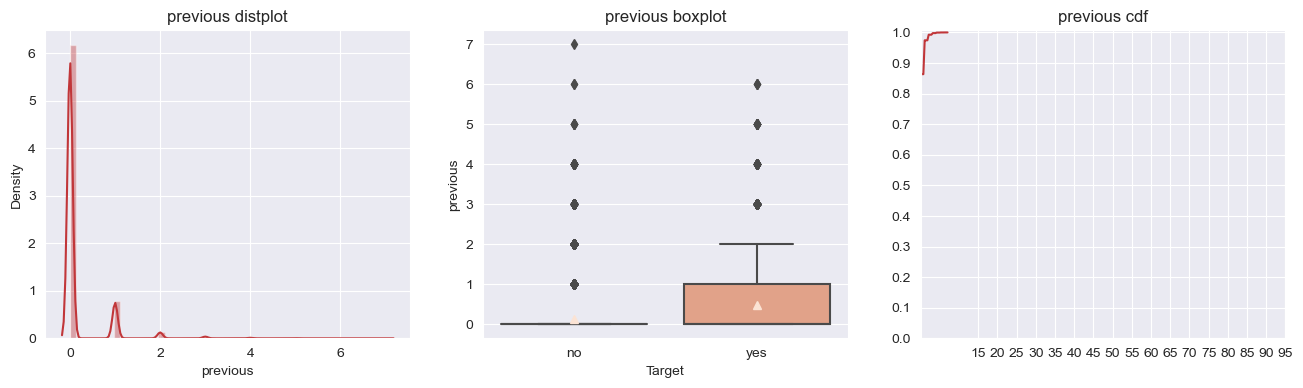

<Figure size 640x480 with 0 Axes>

In [117]:
col = int_col[-1]
plot_int(col)

In [125]:
Q1 = df2['previous'].quantile(.20)
Q3 = df2['previous'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df2 = df2[df2['previous'] >= lower] 
df2 = df2[df2['previous'] <=upper]

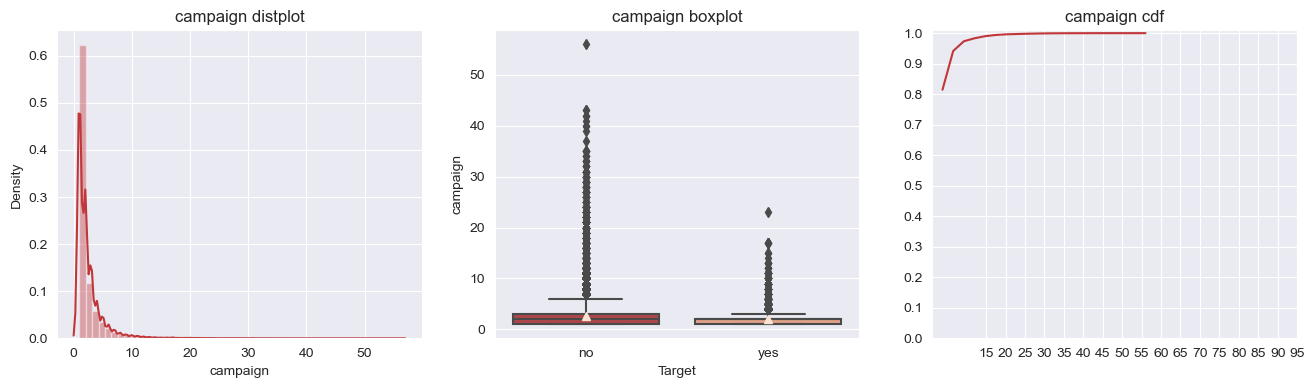

<Figure size 640x480 with 0 Axes>

In [119]:
col = int_col[1]
plot_int(col)

In [126]:
Q1 = df2['campaign'].quantile(.20)
Q3 = df2['campaign'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df2 = df2[df2['campaign'] >= lower] 
df2 = df2[df2['campaign'] <=upper]

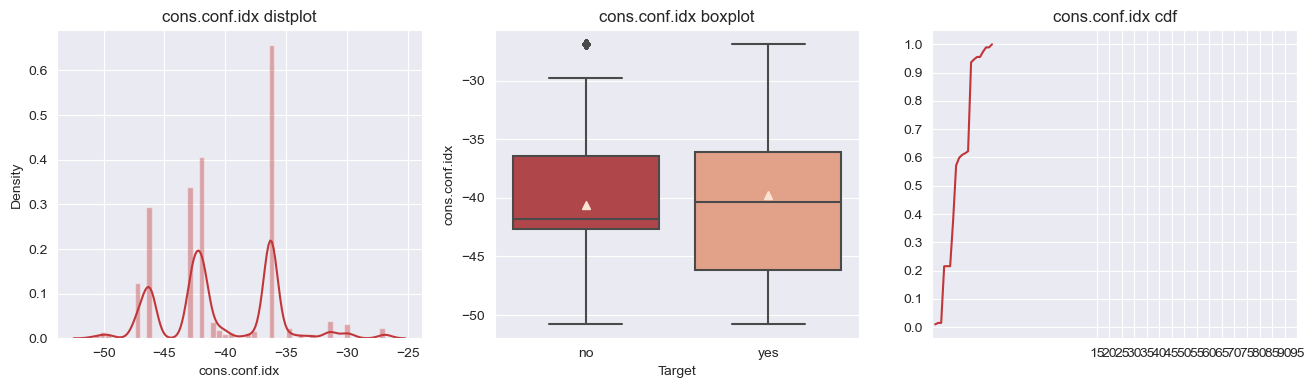

<Figure size 640x480 with 0 Axes>

In [121]:
col = int_col[2]
plot_int(col)

In [127]:
Q1 = df2['cons.conf.idx'].quantile(.20)
Q3 = df2['cons.conf.idx'].quantile(.80)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df2 = df2[df2['cons.conf.idx'] >= lower] 
df2 = df2[df2['cons.conf.idx'] <=upper]

At this point, we have removed the outliers we saw in our ordinal data and thus can now work on our outlier free data

### Visualization for outlier-free data <a class="anchor" id="7"></a>

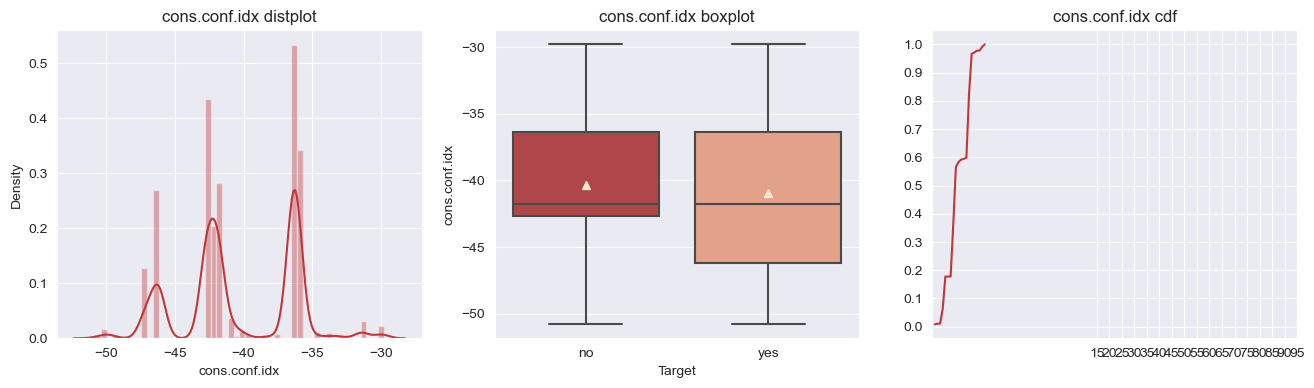

<Figure size 640x480 with 0 Axes>

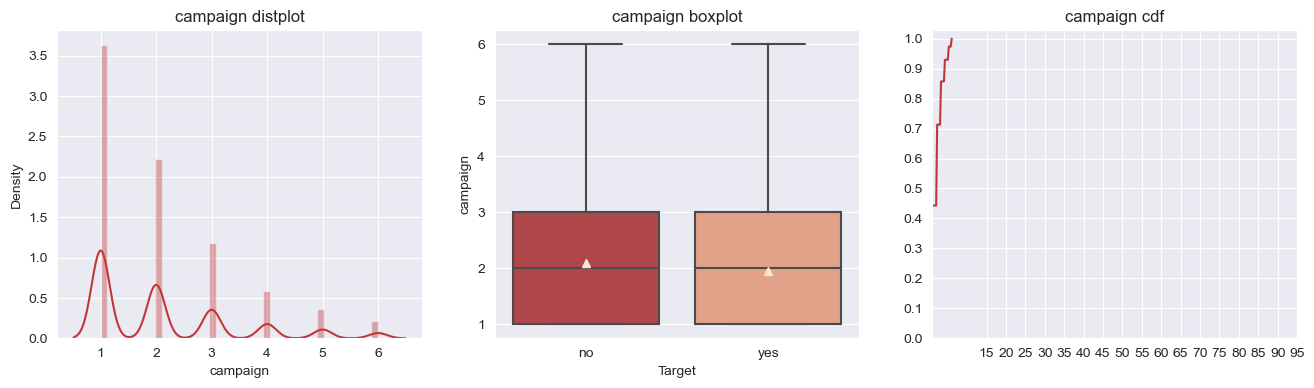

<Figure size 640x480 with 0 Axes>

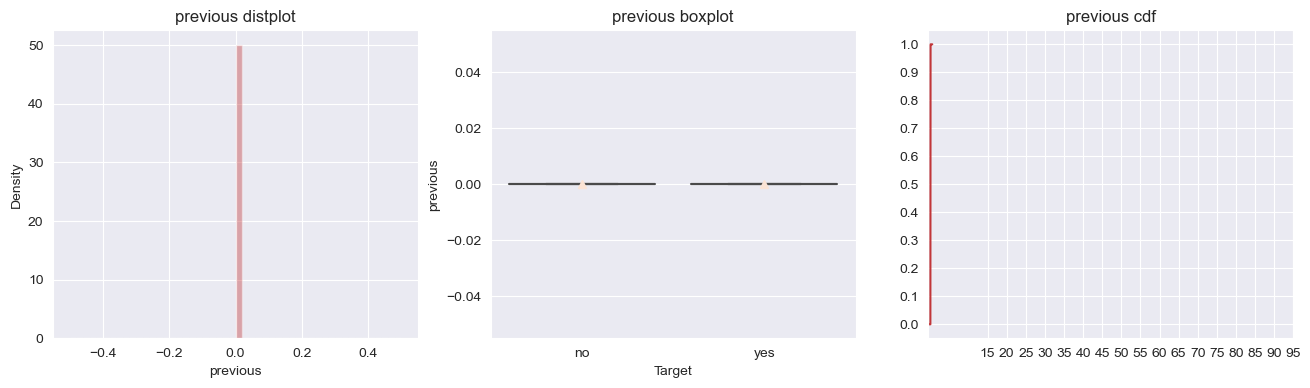

<Figure size 640x480 with 0 Axes>

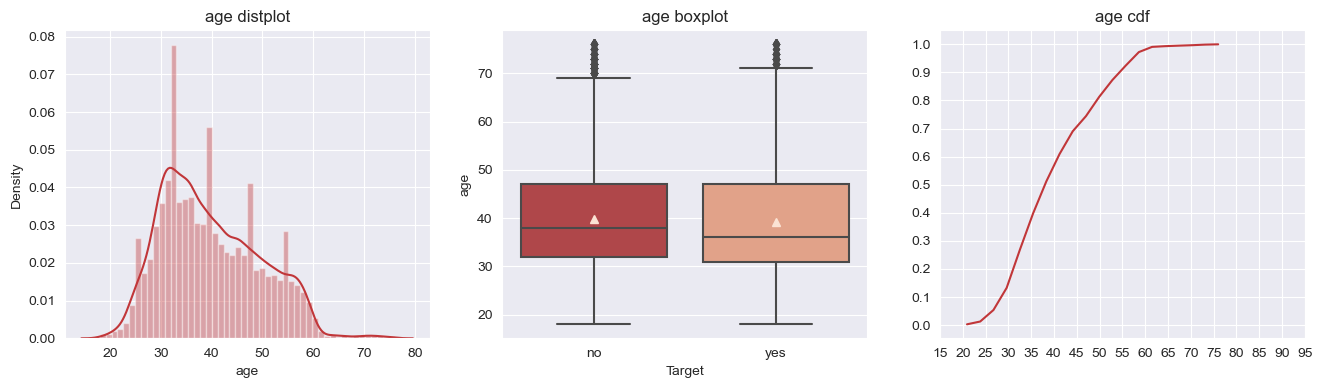

<Figure size 640x480 with 0 Axes>

In [131]:
int_col2 =['cons.conf.idx','campaign','previous','age']
for col in int_col2:
    plot_int(col,df2)

### Splitting Data <a class="anchor" id="8"></a>

In [134]:
X= dataProcessed.drop('y', axis=1).values
Y= dataProcessed['y'].values

xTrain,xTest,yTrain,yTest = train_test_split(X,Y,test_size=.30, random_state=42)
del ytrain
print('X train size: ', xTrain.shape)
print('y train size: ', yTrain.shape)
print('X test size: ', xTest.shape)
print('y test size: ', yTest.shape)

X train size:  (28831, 54)
y train size:  (28831,)
X test size:  (12357, 54)
y test size:  (12357,)


### Scaling Data

In [137]:
df_cols

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [140]:
dataProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  int64  
 2   housing                        41188 non-null  int64  
 3   loan                           41188 non-null  int64  
 4   campaign                       41188 non-null  int64  
 5   pdays                          41188 non-null  int64  
 6   previous                       41188 non-null  int64  
 7   poutcome                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

In [139]:
idx_numeric =[0,7,8,10,11,12,13]
print(dataProcessed.columns[idx_numeric])

scaler =StandardScaler()

Index(['age', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


In [141]:
xTrain[:,idx_numeric]=scaler.fit_transform(xTrain[:,idx_numeric])
xTest[:,idx_numeric]=scaler.transform(xTest[:,idx_numeric])

## Building svm model <a class="anchor" id="9"></a>

In [142]:
tuned_parameters= [{
    'kernel':['rbf'],
    'gamma':[0.1],
    'C':[1]},
    {
        'kernel':['linear'],'C':[1]
    }]
clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(xTrain, yTrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']},
                         {'C': [1], 'kernel': ['linear']}],
             scoring='precision')

In [143]:
print(clf.cv_results_)

{'mean_fit_time': array([45.07666578, 14.33071408]), 'std_fit_time': array([7.69810719, 3.67405626]), 'mean_score_time': array([7.11687288, 0.87272978]), 'std_score_time': array([0.13503807, 0.03018207]), 'param_C': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --],
             mask=[False,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}], 'split0_test_score': array([0.6640625, 0.6751269]), 'split1_test_score': array([0.65811966, 0.58293839]), 'split2_test_score': array([0.66521739, 0.67428571]), 'split3_test_score': array([0.68558952, 0.6827957 ]), 'split4_test_score': array([0.68825911, 0.7202381 ]), 'mean_test_score': array([0.67224964, 0.66707696]), 'std_t

In [144]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.6722496356772804


In [145]:
yPred = clf.predict(xTest)
print(yPred)

[0 0 0 ... 0 0 0]


In [146]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10968
           1       0.65      0.24      0.35      1389

    accuracy                           0.90     12357
   macro avg       0.78      0.61      0.65     12357
weighted avg       0.88      0.90      0.88     12357



### Confusion matrix heatmap for better understanding <a class="anchor" id="10"></a>

Text(0.5, 25.52222222222222, 'Pred')

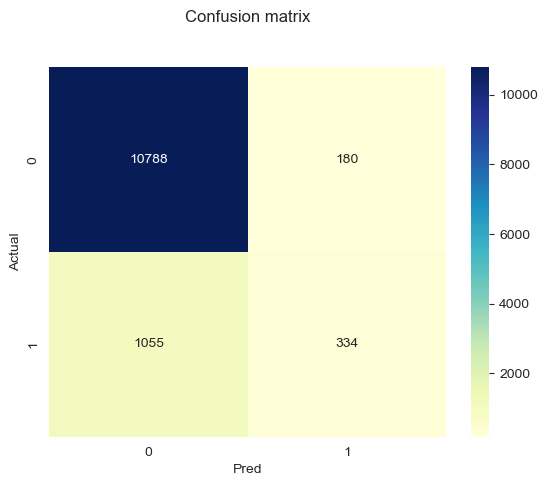

In [150]:
cnf_matrix = confusion_matrix(yTest,yPred)
plot_cnf= sns.heatmap(pd.DataFrame(cnf_matrix),cmap='YlGnBu',annot=True,fmt='g')
plt.title('Confusion matrix' ,y=1.1)
plt.ylabel('Actual')
plt.xlabel('Pred')

### Observation <a class="anchor" id="11"></a>

We here observed that most of the calls that were not received were predicted easily. So I'd suggest the management to take chances if the predicted is 1, because if prediction is 0, then it is highly likely that the prediction is true

Like over 90% of the time when it was predicted 'No' for call received, it was true, hence gives idea if placing the call is the kkey to marketing here or not

In [160]:
# prediction for observation number 4 and 20

print(f"Predition for #4 :{clf.predict(np.array([dataProcessed.iloc[3].drop('y')]))} , actual outcome : {dataProcessed.iloc[3]['y']}")

Predition for #4 :[0] , actual outcome : 0.0


In [161]:
print(f"Predition for #20 :{clf.predict(np.array([dataProcessed.iloc[19].drop('y')]))} , actual outcome : {dataProcessed.iloc[19]['y']}")

Predition for #20 :[0] , actual outcome : 0.0


We were required to find on the observations #4 and #20 (ie indices 3 and 19), where the actual outcome was '0' ie No and our model predicted the same output as a result of it. Hence, we have clearly created a usable support vector machine model for the given data